<a href="https://colab.research.google.com/github/Charanialahari/ExplainableAI_SHAP/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Model Equation: y = 10.0000 + 5.0000 * x
Intercept: 10.0000
Slope: 5.0000
Predicted cars sold for 10 TV ads: 60.00

Results with SHAP values:
   Number of TV Ads  Number of Cars Sold  Prediction  Expected_Value  \
0                 1                   14        15.0            20.0   
1                 3                   24        25.0            20.0   
2                 2                   18        20.0            20.0   
3                 1                   17        15.0            20.0   
4                 3                   27        25.0            20.0   

   SHAP_Value  Expected_plus_SHAP  
0        -5.0                15.0  
1         5.0                25.0  
2         0.0                20.0  
3        -5.0                15.0  
4         5.0                25.0  


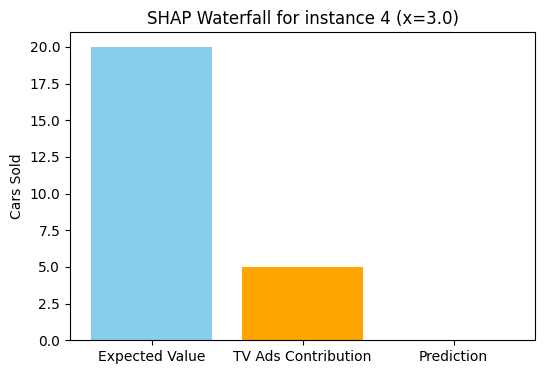

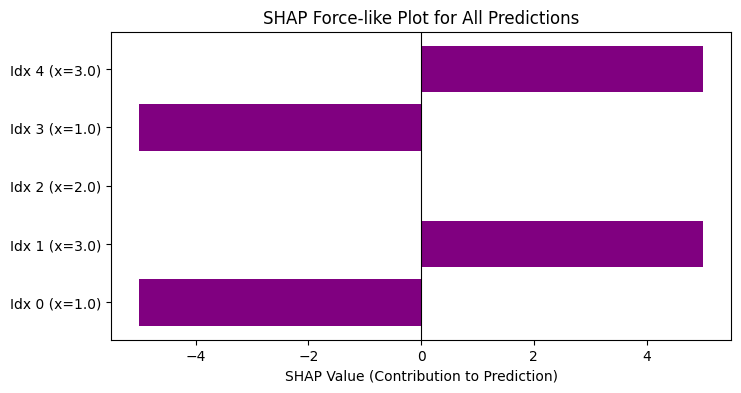

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1.Load Dataset
df = pd.read_excel("Car_Sales.xlsx")

# Rename columns if needed
if 'x' in df.columns and 'y' in df.columns:
    df = df.rename(columns={'x': 'Number of TV Ads', 'y': 'Number of Cars Sold'})
else:
    df = df.rename(columns={df.columns[0]: 'Number of TV Ads', df.columns[1]: 'Number of Cars Sold'})

# Extract variables
X = df[['Number of TV Ads']].astype(float).values
y = df['Number of Cars Sold'].astype(float).values


# 2. Fit Linear Regression
model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
slope = model.coef_[0]

print(f"Linear Model Equation: y = {intercept:.4f} + {slope:.4f} * x")
print(f"Intercept: {intercept:.4f}")
print(f"Slope: {slope:.4f}")

# 3. Prediction for 10 TV ads

x_pred = 10
y_pred_10 = model.predict([[x_pred]])[0]
print(f"Predicted cars sold for {x_pred} TV ads: {y_pred_10:.2f}")


# 4. SHAP Values (Analytical for Linear Model)
mean_x = np.mean(X)
expected_value = model.predict([[mean_x]])[0]
shap_values = (X.flatten() - mean_x) * slope
predictions = model.predict(X)

# Combine into a results DataFrame
results_df = df.copy()
results_df['Prediction'] = predictions
results_df['Expected_Value'] = expected_value
results_df['SHAP_Value'] = shap_values
results_df['Expected_plus_SHAP'] = results_df['Expected_Value'] + results_df['SHAP_Value']

print("\nResults with SHAP values:")
print(results_df)

# 5. SHAP-style Waterfall Plot (example: last instance)

idx = len(df) - 1
shap_i = shap_values[idx]
pred_i = predictions[idx]

plt.figure(figsize=(6,4))
bars = ['Expected Value', 'TV Ads Contribution', 'Prediction']
vals = [expected_value, shap_i, pred_i - (expected_value + shap_i)]
plt.bar(bars, [expected_value, shap_i, pred_i - (expected_value + shap_i)], color=['skyblue', 'orange', 'green'])
plt.title(f"SHAP Waterfall for instance {idx} (x={X[idx][0]})")
plt.ylabel("Cars Sold")
plt.show()


# 6. Force-like SHAP Plot (All instances)

plt.figure(figsize=(8,4))
y_pos = np.arange(len(df))
plt.barh(y_pos, shap_values, color='purple')
plt.yticks(y_pos, [f"Idx {i} (x={X[i][0]})" for i in range(len(df))])
plt.axvline(0, color='black', linewidth=0.8)
plt.xlabel("SHAP Value (Contribution to Prediction)")
plt.title("SHAP Force-like Plot for All Predictions")
plt.show()

Linear model: y = 20.0000 + 0.5000 * IQ + 0.5000 * StudyHours
Prediction for IQ=95, StudyHours=25: 80.0000

Coefficient interpretation:
IQ coefficient = 0.5000
Study Hours coefficient = 0.5000
Intercept = 20.0000

SHAP analysis:
Student 1: IQ=110.0, Hours=40.0, SHAP_IQ=5.0000, SHAP_Hours=10.0000, Total SHAP=15.0000
Student 2: IQ=120.0, Hours=30.0, SHAP_IQ=10.0000, SHAP_Hours=5.0000, Total SHAP=15.0000
Student 3: IQ=100.0, Hours=20.0, SHAP_IQ=0.0000, SHAP_Hours=0.0000, Total SHAP=0.0000
Student 4: IQ=90.0, Hours=0.0, SHAP_IQ=-5.0000, SHAP_Hours=-10.0000, Total SHAP=-15.0000
Student 5: IQ=80.0, Hours=10.0, SHAP_IQ=-10.0000, SHAP_Hours=-5.0000, Total SHAP=-15.0000


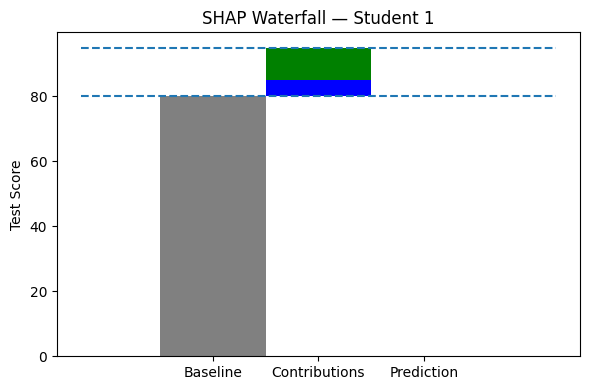

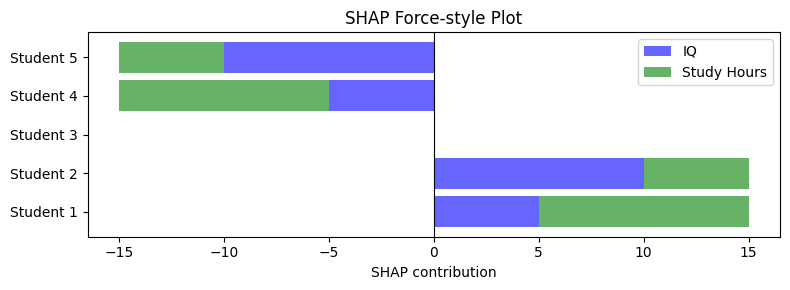


Students where Study Hours contributes more than IQ:
Student 1
Student 4


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_excel("StudyHour.xlsx")

col_x1 = 'IQ \n'
col_x2 = 'StudyHours'
col_y = 'TestScore'

X = df[[col_x1, col_x2]].values
y = df[col_y].values

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
coef_iq = model.coef_[0]
coef_hours = model.coef_[1]

print(f"Linear model: y = {intercept:.4f} + {coef_iq:.4f} * IQ + {coef_hours:.4f} * StudyHours")

iq_test = 95
hours_test = 25
pred_test = intercept + coef_iq * iq_test + coef_hours * hours_test
print(f"Prediction for IQ={iq_test}, StudyHours={hours_test}: {pred_test:.4f}")

print("\nCoefficient interpretation:")
print(f"IQ coefficient = {coef_iq:.4f}")
print(f"Study Hours coefficient = {coef_hours:.4f}")
print(f"Intercept = {intercept:.4f}")

df['Prediction'] = model.predict(X)
baseline = df['Prediction'].mean()
mean_x1 = df[col_x1].mean()
mean_x2 = df[col_x2].mean()
df['SHAP_IQ'] = coef_iq * (df[col_x1] - mean_x1)
df['SHAP_Hours'] = coef_hours * (df[col_x2] - mean_x2)
df['SHAP_Total'] = df['SHAP_IQ'] + df['SHAP_Hours']

print("\nSHAP analysis:")
for i, row in df.iterrows():
    print(f"Student {i+1}: IQ={row[col_x1]}, Hours={row[col_x2]}, "
          f"SHAP_IQ={row['SHAP_IQ']:.4f}, SHAP_Hours={row['SHAP_Hours']:.4f}, "
          f"Total SHAP={row['SHAP_Total']:.4f}")

inst_idx = 0
baseline_val = baseline
shap_iq = df.loc[inst_idx, 'SHAP_IQ']
shap_hours = df.loc[inst_idx, 'SHAP_Hours']
pred_val = df.loc[inst_idx, 'Prediction']

plt.figure(figsize=(6, 4))
y_base = baseline_val
contribs = [shap_iq, shap_hours]
features = ['IQ', 'Study Hours']
colors = ['blue', 'green']

pos = 0
plt.bar(pos, y_base, color='gray', width=0.4)
for c, f, col in zip(contribs, features, colors):
    if c >= 0:
        plt.bar(pos + 0.4, c, bottom=y_base, color=col, width=0.4)
        y_base += c
    else:
        plt.bar(pos + 0.4, c, bottom=y_base + c, color=col, width=0.4)
        y_base += c

plt.xticks([0, 0.4, 0.8], ['Baseline', 'Contributions', 'Prediction'])
plt.hlines([baseline_val, pred_val], xmin=-0.5, xmax=1.3, linestyles='dashed')
plt.ylabel('Test Score')
plt.title(f'SHAP Waterfall — Student {inst_idx+1}')
plt.tight_layout()
plt.show()

n = len(df)
y_pos = np.arange(n)
plt.figure(figsize=(8, n * 0.6))
for i in range(n):
    plt.barh(i, df.loc[i, 'SHAP_IQ'], color='blue', alpha=0.6, label='IQ' if i == 0 else "")
    plt.barh(i, df.loc[i, 'SHAP_Hours'], left=df.loc[i, 'SHAP_IQ'], color='green', alpha=0.6, label='Study Hours' if i == 0 else "")
plt.axvline(0, color='black', linewidth=0.8)
plt.yticks(y_pos, [f"Student {i+1}" for i in range(n)])
plt.xlabel('SHAP contribution')
plt.title('SHAP Force-style Plot')
plt.legend()
plt.tight_layout()
plt.show()

more_hours_than_iq = df[df['SHAP_Hours'].abs() > df['SHAP_IQ'].abs()]
if not more_hours_than_iq.empty:
    print("\nStudents where Study Hours contributes more than IQ:")
    for idx in more_hours_than_iq.index:
        print(f"Student {idx+1}")



Linear model: y = 25792.2002 + 9449.9623 * YearsExperience

Coefficient interpretation:
Slope = 9449.9623
Intercept = 25792.2002

Prediction for 3.5 years: 58867.0683
Prediction for 7 years: 91941.9364

SHAP analysis:
Employee 1: Years=1.1, SHAP_Years=-39815.8412
Employee 2: Years=1.3, SHAP_Years=-37925.8488
Employee 3: Years=1.5, SHAP_Years=-36035.8563
Employee 4: Years=2.0, SHAP_Years=-31310.8752
Employee 5: Years=2.2, SHAP_Years=-29420.8827
Employee 6: Years=2.9, SHAP_Years=-22805.9091
Employee 7: Years=3.0, SHAP_Years=-21860.9128
Employee 8: Years=3.2, SHAP_Years=-19970.9204
Employee 9: Years=3.2, SHAP_Years=-19970.9204
Employee 10: Years=3.7, SHAP_Years=-15245.9392
Employee 11: Years=3.9, SHAP_Years=-13355.9467
Employee 12: Years=4.0, SHAP_Years=-12410.9505
Employee 13: Years=4.0, SHAP_Years=-12410.9505
Employee 14: Years=4.1, SHAP_Years=-11465.9543
Employee 15: Years=4.5, SHAP_Years=-7685.9694
Employee 16: Years=4.9, SHAP_Years=-3905.9844
Employee 17: Years=5.1, SHAP_Years=-2015.

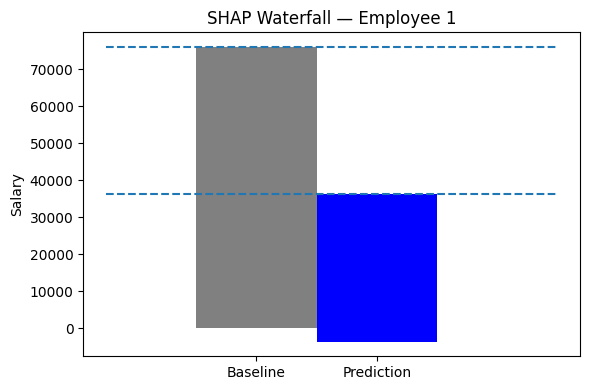

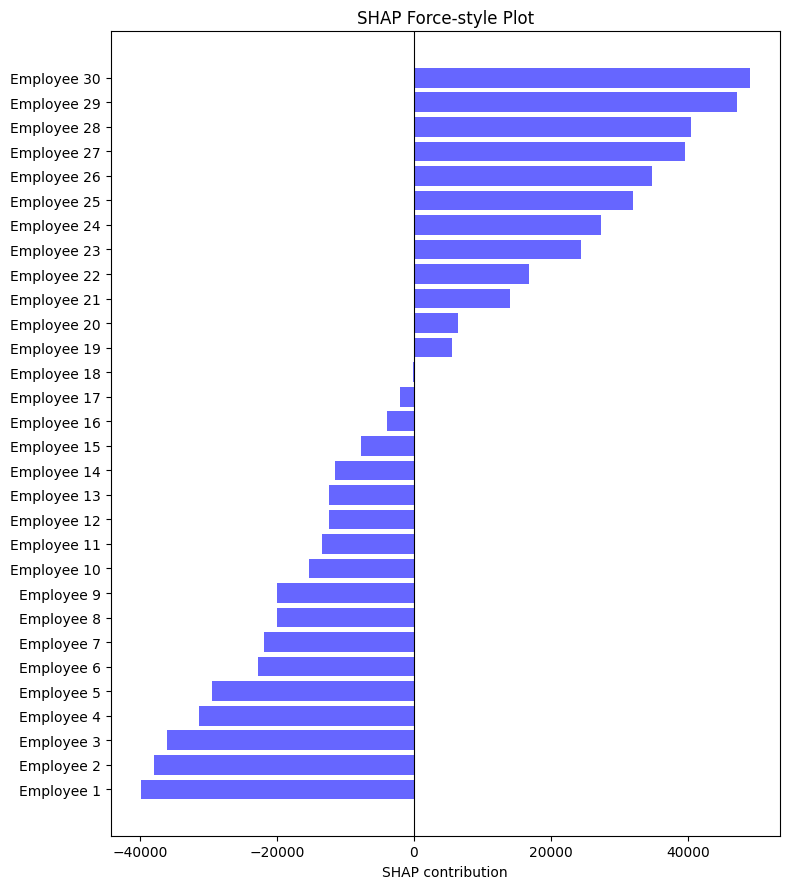

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv("Experience_Salary.csv")

X = df[['YearsExperience']].values
y = df['Salary'].values

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
slope = model.coef_[0]
print(f"Linear model: y = {intercept:.4f} + {slope:.4f} * YearsExperience")

print("\nCoefficient interpretation:")
print(f"Slope = {slope:.4f}")
print(f"Intercept = {intercept:.4f}")

pred_3_5 = intercept + slope * 3.5
pred_7 = intercept + slope * 7
print(f"\nPrediction for 3.5 years: {pred_3_5:.4f}")
print(f"Prediction for 7 years: {pred_7:.4f}")

df['Prediction'] = model.predict(X)
baseline = df['Prediction'].mean()
mean_x = df['YearsExperience'].mean()
df['SHAP_Years'] = slope * (df['YearsExperience'] - mean_x)

print("\nSHAP analysis:")
for i, row in df.iterrows():
    print(f"Employee {i+1}: Years={row['YearsExperience']}, "
          f"SHAP_Years={row['SHAP_Years']:.4f}")

inst_idx = 0
baseline_val = baseline
shap_years = df.loc[inst_idx, 'SHAP_Years']
pred_val = df.loc[inst_idx, 'Prediction']

plt.figure(figsize=(6, 4))
y_base = baseline_val
if shap_years >= 0:
    plt.bar(0, y_base, color='gray', width=0.4)
    plt.bar(0.4, shap_years, bottom=y_base, color='blue', width=0.4)
else:
    plt.bar(0, y_base, color='gray', width=0.4)
    plt.bar(0.4, shap_years, bottom=y_base + shap_years, color='blue', width=0.4)

plt.xticks([0, 0.4], ['Baseline', 'Prediction'])
plt.hlines([baseline_val, pred_val], xmin=-0.5, xmax=1, linestyles='dashed')
plt.ylabel('Salary')
plt.title(f'SHAP Waterfall — Employee {inst_idx+1}')
plt.tight_layout()
plt.show()

n = len(df)
y_pos = np.arange(n)
plt.figure(figsize=(8, n * 0.3))
plt.barh(y_pos, df['SHAP_Years'], color='blue', alpha=0.6)
plt.axvline(0, color='black', linewidth=0.8)
plt.yticks(y_pos, [f"Employee {i+1}" for i in range(n)])
plt.xlabel('SHAP contribution')
plt.title('SHAP Force-style Plot')
plt.tight_layout()
plt.show()

Sales = 993.92 + (8.22 × Intelligence) + (49.71 × Extroversion)
Intercept: 993.92
Intelligence coefficient: 8.22
Extroversion coefficient: 49.71
Prediction for Intelligence=100, Extroversion=25: 3058.63
Prediction for Intelligence=120, Extroversion=18: 2875.07


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


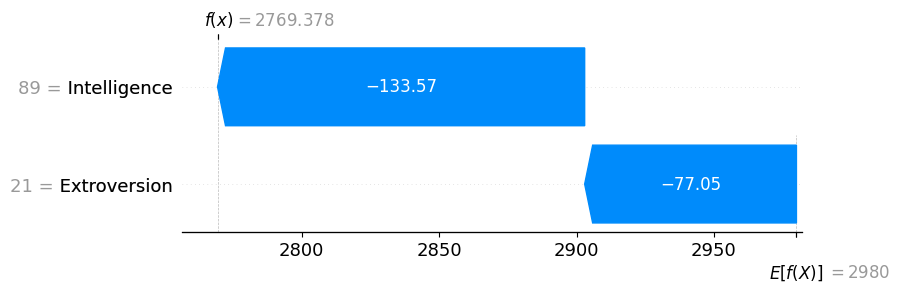

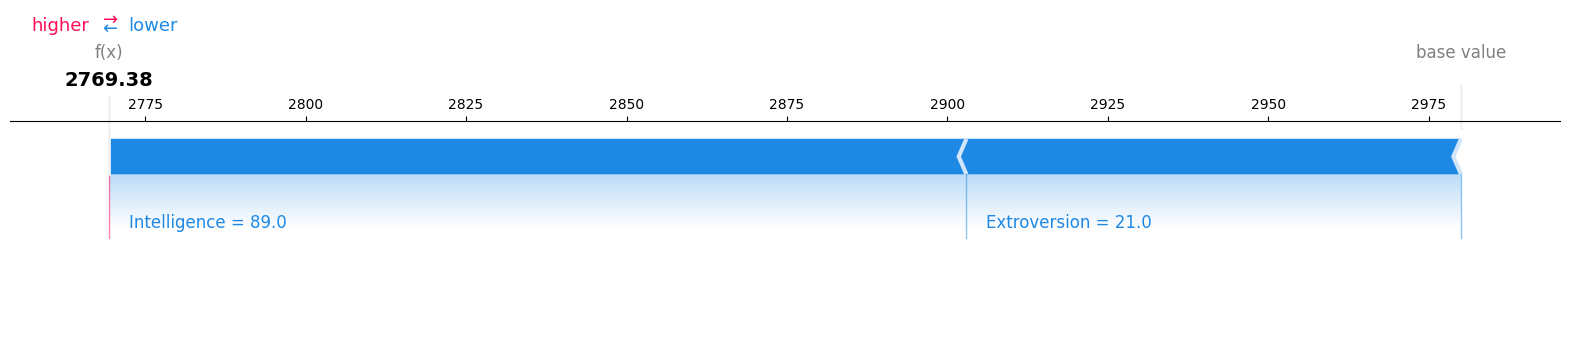

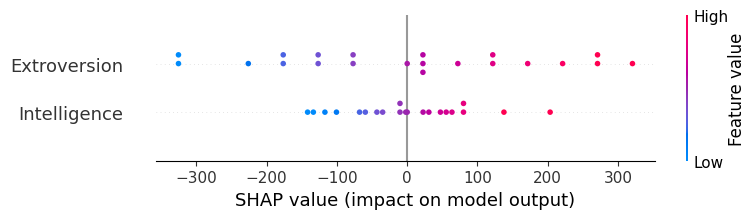

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import shap
import matplotlib.pyplot as plt

df = pd.read_excel("Int_Ext.xlsx")
df_clean = df[['Int', 'Ext', 'sal']].dropna()
df_clean.columns = ['Intelligence', 'Extroversion', 'Sales']

X = df_clean[['Intelligence', 'Extroversion']]
y = df_clean['Sales']

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
coef_intelligence, coef_extroversion = model.coef_

print(f"Sales = {intercept:.2f} + ({coef_intelligence:.2f} × Intelligence) + ({coef_extroversion:.2f} × Extroversion)")

print(f"Intercept: {intercept:.2f}")
print(f"Intelligence coefficient: {coef_intelligence:.2f}")
print(f"Extroversion coefficient: {coef_extroversion:.2f}")

pred_1 = model.predict([[100, 25]])[0]
pred_2 = model.predict([[120, 18]])[0]

print(f"Prediction for Intelligence=100, Extroversion=25: {pred_1:.2f}")
print(f"Prediction for Intelligence=120, Extroversion=18: {pred_2:.2f}")

np.bool = np.bool_
np.str = str

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap.waterfall_plot(shap_values[0])
plt.show()

shap.force_plot(explainer.expected_value, shap_values[0].values, X.iloc[0], matplotlib=True)
plt.show()

shap.summary_plot(shap_values, X)



Sales = 10.996 + (0.19924 × Facebook) + (0.00693 × Newspaper)
Intercept: 10.996
Facebook coefficient: 0.19924
Newspaper coefficient: 0.00693
Prediction for Facebook=50, Newspaper=70: 21.44
Prediction for Facebook=25, Newspaper=30: 16.18


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


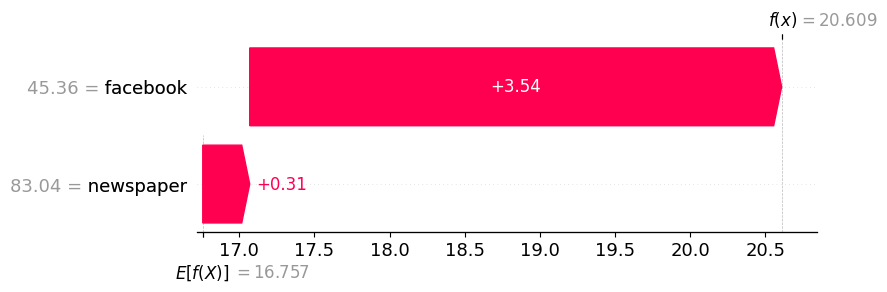

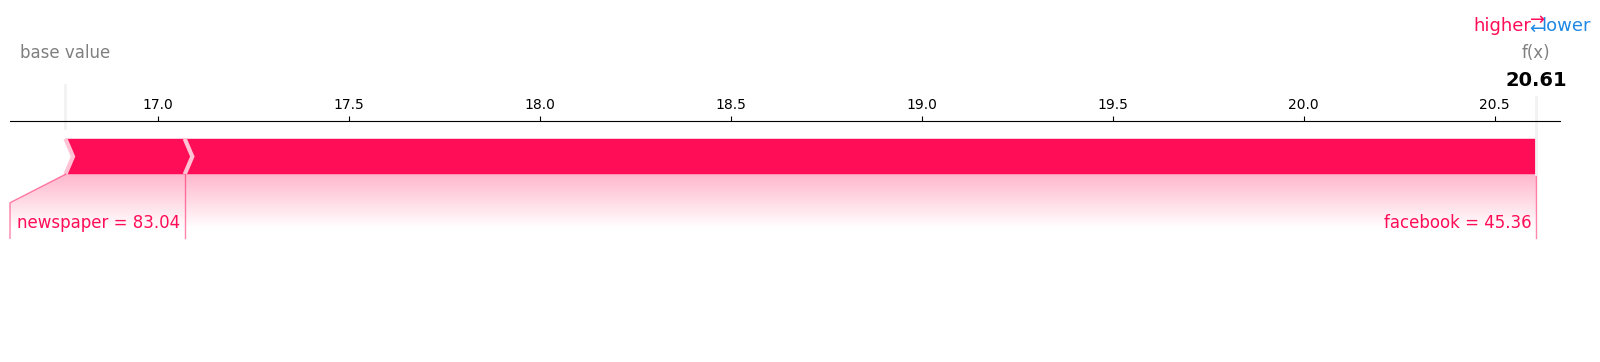

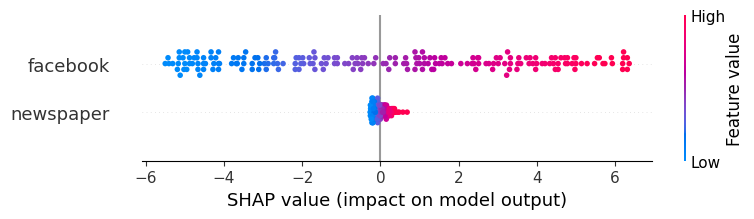

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import shap
import matplotlib.pyplot as plt

df = pd.read_excel("Marketing_Dataset.xlsx")
df_clean = df[['facebook', 'newspaper', 'sales']]

X = df_clean[['facebook', 'newspaper']]
y = df_clean['sales']

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
coef_fb, coef_np = model.coef_

print(f"Sales = {intercept:.3f} + ({coef_fb:.5f} × Facebook) + ({coef_np:.5f} × Newspaper)")
print(f"Intercept: {intercept:.3f}")
print(f"Facebook coefficient: {coef_fb:.5f}")
print(f"Newspaper coefficient: {coef_np:.5f}")

pred_1 = model.predict([[50, 70]])[0]
pred_2 = model.predict([[25, 30]])[0]

print(f"Prediction for Facebook=50, Newspaper=70: {pred_1:.2f}")
print(f"Prediction for Facebook=25, Newspaper=30: {pred_2:.2f}")

np.bool = np.bool_
np.str = str

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap.waterfall_plot(shap_values[0])
plt.show()

shap.force_plot(explainer.expected_value, shap_values[0].values, X.iloc[0], matplotlib=True)
plt.show()

shap.summary_plot(shap_values, X)
